In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Importing The Datset

In [3]:
used_car_data = pd.read_csv('/Users/divyanshumittal/Downloads/Data ANalytics Project/Used Car Predictions/used_cars_data.csv')

In [4]:
## Seeking First Five Values

In [5]:
used_car_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
## Drop The Column S.NO.

In [7]:
used_car_data = used_car_data.drop('S.No.',axis=1)

In [8]:
## Checking Data Types

In [9]:
used_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [10]:
## Here We Need To Convert Some Colums DataType 

In [11]:
col = ['Mileage','Engine','Power','New_Price']

In [12]:
used_car_data[col].head()

,Mileage,Engine,Power,New_Price
0,26.6 km/kg,998 CC,58.16 bhp,NaN
1,19.67 kmpl,1582 CC,126.2 bhp,NaN
2,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh
3,20.77 kmpl,1248 CC,88.76 bhp,NaN
4,15.2 kmpl,1968 CC,140.8 bhp,NaN


In [13]:
## Here We Need To Remove The Units

In [1]:
## Make a copy original data

In [15]:
used_car_copy = used_car_data.copy()

In [16]:
used_car_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [17]:
used_car_copy['Mileage'] = used_car_copy['Mileage'].str.split().str.get(0)
used_car_copy['Engine'] = used_car_copy['Engine'].str.split().str.get(0)
used_car_copy['Power'] = used_car_copy['Power'].str.split().str.get(0)
used_car_copy['New_Price'] = used_car_copy['New_Price'].str.split().str.get(0)

In [18]:
used_car_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [19]:
convert_datatype = {'Mileage':float,'Engine':float}

In [20]:
used_car_copy = used_car_copy.astype(convert_datatype)

In [21]:
## Power Col Contains Null Values like null 

In [22]:
used_car_copy['Power'] = used_car_copy['Power'].replace('null',np.nan)

In [23]:
used_car_copy['Power'] = used_car_copy['Power'].astype(float)

In [24]:
## New_Price Col Contains Null Value like null

In [25]:
used_car_copy['New_Price'] = used_car_copy['New_Price'].replace('null',np.nan)

In [26]:
used_car_copy['New_Price'] = used_car_copy['New_Price'].astype(float)

In [27]:
## Now Checking The DataType

In [28]:
used_car_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


**Note:**<br>
        1. Col New_Price Contain Units Like Cr and Lakhs Where Value less than the 2 Represent the              unit Cr and above Represent Lakhs <br>

In [29]:
## Check For The Missing Values

In [30]:
miss_value = used_car_copy.isnull().sum()
percentage = (used_car_copy.isnull().sum()/len(used_car_copy))*100
missing_values = pd.concat([miss_value,percentage],axis=1,keys=['values','percentage'])

In [31]:
missing_values

,values,percentage
Name,0,0.000000
Location,0,0.000000
Year,0,0.000000
Kilometers_Driven,0,0.000000
Fuel_Type,0,0.000000
Transmission,0,0.000000
Owner_Type,0,0.000000
Mileage,2,0.027575
Engine,46,0.634220
Power,175,2.412795


In [32]:
## Percentage of New_Price Col is so high so we can drop it.

In [33]:
used_car_copy.drop('New_Price',axis=1,inplace=True)

In [34]:
## Now Create Some New Feacture Columns Like Car Model, Car Name , Car Age

In [35]:
from datetime import date

In [36]:
Curr_Year = date.today().year

In [37]:
used_car_copy['Car_Age'] = Curr_Year - used_car_copy['Year']

In [38]:
used_car_copy['Brand'] = used_car_copy['Name'].str.split().str.get(0)
used_car_copy['Model'] = used_car_copy['Name'].str.split().str.get(1) + used_car_copy['Name'].str.split().str.get(2)

In [39]:
used_car_copy.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10,Audi,A4New


In [40]:
## Now Checking For Brand And Model Unique Value

In [41]:
used_car_copy['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [42]:
## Here We Can See That The Brand Like Land, Mini, Isuzu, ISUZU are Wrong So We Need To Correct them.

In [43]:
Cars = ['Isuzu' ,'ISUZU','Mini','Land']
used_car_copy[used_car_copy.Brand.str.contains('|'.join(Cars))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,9,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,17.50,11,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,23.00,6,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,55.76,5,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,35.67,6,Mini,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,6,ISUZU,D-MAXV-Cross
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.80,1998.0,192.00,5.0,NaN,6,Mini,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.70,2179.0,187.70,5.0,NaN,8,Land,RoverRange
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.80,1998.0,112.00,5.0,NaN,10,Mini,CooperCountryman


In [44]:
used_car_copy["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [45]:
used_car_copy[used_car_copy.Brand.str.contains('|'.join(Cars))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,9,Land Rover,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,17.50,11,Land Rover,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,23.00,6,Mini Cooper,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,55.76,5,Land Rover,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,35.67,6,Mini Cooper,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,6,Isuzu,D-MAXV-Cross
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.80,1998.0,192.00,5.0,NaN,6,Mini Cooper,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.70,2179.0,187.70,5.0,NaN,8,Land Rover,RoverRange
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.80,1998.0,112.00,5.0,NaN,10,Mini Cooper,CooperCountryman


In [46]:
## In Model Col We Need Also To Change Them

In [47]:
used_car_copy[used_car_copy['Brand'] == 'Land Rover']['Model'].unique()

array(['RoverRange', 'RoverFreelander', 'RoverDiscovery'], dtype=object)

In [65]:
## Check Change In Dummy Data

In [48]:
used_car_copy[used_car_copy['Brand'] == 'Land Rover'].replace('RoverRange','RangeRover',inplace=True)
used_car_copy[used_car_copy['Brand'] == 'Land Rover'].replace('RoverFreelander','Freelander',inplace=True)
used_car_copy[used_car_copy['Brand'] == 'Land Rover'].replace('RoverDiscovery','Discovery',inplace=True)

In [66]:
## Apply The Change In Dataset

In [49]:
used_car_copy['Model'].replace('RoverRange','RangeRover',inplace=True)
used_car_copy['Model'].replace('RoverFreelander','Freelander',inplace=True)
used_car_copy['Model'].replace('RoverDiscovery','Discovery',inplace=True)

In [50]:
used_car_copy[used_car_copy['Brand'] == 'Mini Cooper']['Model'].unique()

array(['CountrymanCooper', 'CooperConvertible', 'ClubmanCooper',
       'Cooper5', 'CooperS', 'CooperCountryman', 'Cooper3'], dtype=object)

In [51]:
used_car_copy['Model'].replace('CountrymanCooper','Countryman',inplace=True)
used_car_copy['Model'].replace('CooperConvertible','Convertible',inplace=True)
used_car_copy['Model'].replace('ClubmanCooper','Clubman',inplace=True)
used_car_copy['Model'].replace('CooperCountryman','Countryman',inplace=True)

In [67]:
##. Describe() Function Give Statstical Analysis Only For Numerical Values.

In [52]:
used_car_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.00,94.00,138.10,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00
Car_Age,7253.0,9.634634,3.254421,4.00,7.00,9.00,12.00,27.00


**Insights:**<br>
              1. Years range from 1996- 2019 and has a high in a range which shows used cars contain                   both latest models and old model cars. <br>
              2. On average of Kilometers-driven in Used cars are __~58k KM__. The range shows a huge                  difference between min and max as max values show __650000 KM__ shows the                            evidence of an outlier. This record can be removed. <br>
              3. Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a                    data entry issue. <br>
              4. It looks like Engine and Power have outliers, and the data is right-skewed. <br>
              5. The average number of seats in a car is 5. <br>
              6. Cars Sales Values Lies From __4.4Lakhs__ - __16Lakhs__. <br>

In [68]:
## Describe Categorical Columns

In [53]:
used_car_copy.describe(include='object').T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952
Brand,7253,32,Maruti,1444
Model,7252,725,SwiftDzire,189


In [54]:
## Find Out All The Records Where Value is Zero

In [55]:
used_car_copy[used_car_copy.eq(0).any(1)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50,11,Land Rover,Freelander
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67,4,Mercedes-Benz,C-ClassProgressive
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,1.30,18,Hyundai,SantroXing
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,16,Honda,City1.5
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60,8,Ford,FigoDiesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,7,Mahindra,TUV300
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,16,Hyundai,SantroXing
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,12,Land Rover,Freelander
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,4,Honda,Jazz2020


In [56]:
## 2nd Way To Do It. 

In [57]:
used_car_copy[used_car_copy['Mileage'] == 0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50,11,Land Rover,Freelander
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67,4,Mercedes-Benz,C-ClassProgressive
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,1.30,18,Hyundai,SantroXing
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,2.95,16,Honda,City1.5
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,3.60,8,Ford,FigoDiesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,NaN,7,Mahindra,TUV300
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,16,Hyundai,SantroXing
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,12,Land Rover,Freelander
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.0,1199.0,88.7,NaN,NaN,4,Honda,Jazz2020


In [58]:
## These Value Can We FillUp By Using Mean And Median Values.

In [59]:
used_car_copy.loc[used_car_copy['Mileage']==0,'Mileage'] = used_car_copy['Mileage'].mean()

In [60]:
used_car_copy.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

In [61]:
used_car_copy['Mileage'].fillna(used_car_copy['Mileage'].mean(),inplace=True)

In [62]:
used_car_copy[used_car_copy['Model'].isnull() == True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,18,OpelCorsa,NaN


In [63]:
used_car_copy['Model'].fillna('OpelCorsa',inplace=True)

In [71]:
used_car_copy['Seats'].fillna(value=np.nan,inplace=True)
used_car_copy['Seats']=used_car_copy.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
used_car_copy['Engine']=used_car_copy.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))
used_car_copy['Power']=used_car_copy.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [73]:
## Ientify The Categorical And Numerical Columns

In [72]:
cat_cols=used_car_copy.select_dtypes(include=['object']).columns
num_cols = used_car_copy.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Car_Age']


In [74]:
for i in cat_cols:
    print(i,'--','Unique Values:',used_car_copy[i].nunique())
    print(used_car_copy[i].value_counts().sort_values(ascending=False))
    print('-'*50)

Name -- Unique Values: 2041
Mahindra XUV500 W8 2WD                      55
Maruti Swift VDI                            49
Maruti Swift Dzire VDI                      42
Honda City 1.5 S MT                         39
Maruti Swift VDI BSIV                       37
                                            ..
Honda Amaze VX CVT i-VTEC                    1
Honda Jazz 2020 Petrol                       1
Hyundai i20 1.4 Asta AT (O) with Sunroof     1
Renault Lodgy 110PS RxL                      1
Hyundai Elite i20 Magna Plus                 1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Location -- Unique Values: 11
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Fuel_Type -- Unique Values: 5
Diesel      3852
Petrol    

In [75]:
used_car_copy[['Year','Car_Age']].value_counts().sort_values(ascending=False)

Year  Car_Age
2015  8          929
2014  9          925
2016  7          886
2013  10         791
2017  6          709
2012  11         690
2011  12         579
2010  13         407
2018  5          361
2009  14         252
2008  15         207
2007  16         148
2019  4          119
2006  17          89
2005  18          68
2004  19          35
2003  20          20
2002  21          18
2001  22           8
2000  23           5
1998  25           4
1999  24           2
1996  27           1
dtype: int64

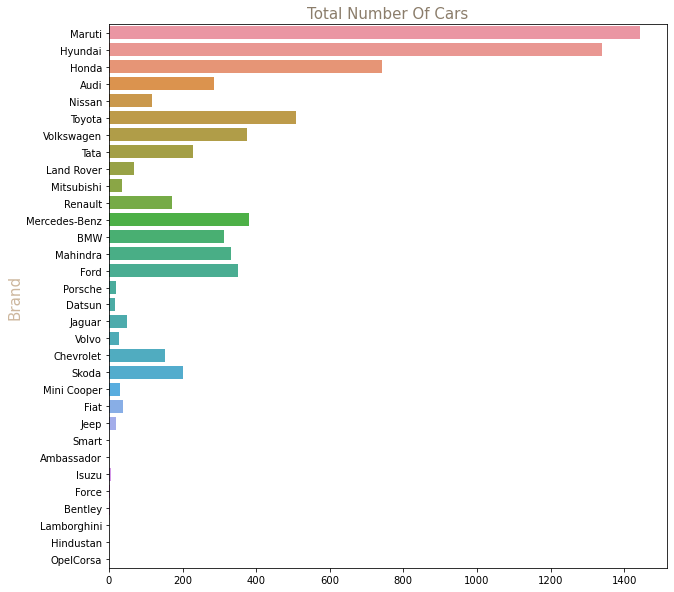

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(y='Brand',data=used_car_copy)
plt.title('Total Number Of Cars',fontsize=(15),color='#8B7D6B')
plt.ylabel('Brand',fontsize=15,color='#CDB79E')
plt.xlabel(None)
plt.show()

In [77]:
(used_car_copy['Brand'].value_counts()/len(used_car_copy))*100

Maruti           19.909003
Hyundai          18.475114
Honda            10.244037
Toyota            6.990211
Mercedes-Benz     5.239211
Volkswagen        5.156487
Ford              4.839377
Mahindra          4.563629
BMW               4.301668
Audi              3.929409
Tata              3.143527
Skoda             2.785054
Renault           2.343858
Chevrolet         2.081897
Nissan            1.613126
Land Rover        0.923756
Jaguar            0.661795
Fiat              0.523921
Mitsubishi        0.496346
Mini Cooper       0.427409
Volvo             0.386047
Porsche           0.261961
Jeep              0.261961
Datsun            0.234386
Isuzu             0.068937
Force             0.041362
Bentley           0.027575
Smart             0.013787
Ambassador        0.013787
Lamborghini       0.013787
Hindustan         0.013787
OpelCorsa         0.013787
Name: Brand, dtype: float64

**Insight:**<br>
            1. **20%** of cars belong to the brand __Maruti__ followed by **19%** of cars belonging to                  __Hyundai__.

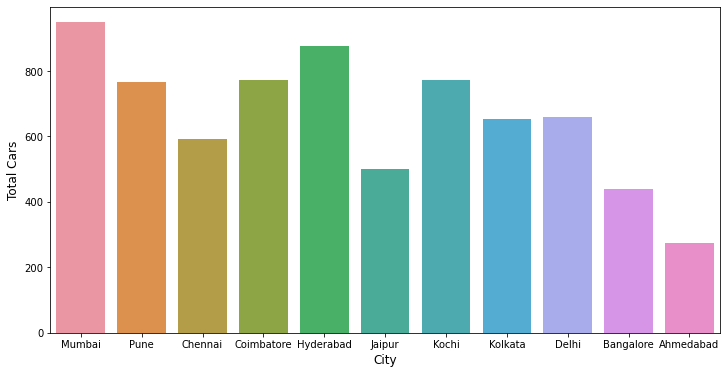

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x='Location',data=used_car_copy)
plt.ylabel('Total Cars',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.show()

In [79]:
(used_car_copy['Location'].value_counts()/len(used_car_copy))*100

Mumbai        13.084241
Hyderabad     12.077761
Coimbatore    10.643872
Kochi         10.643872
Pune          10.547360
Delhi          9.099683
Kolkata        9.016958
Chennai        8.148352
Jaipur         6.879912
Bangalore      6.066455
Ahmedabad      3.791535
Name: Location, dtype: float64

**Insight:**<br>
1. Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore. <br>
2. **13%** Of Cars Belongs From Mumbai And Top 5 City After Mumbai Are Hyderabad, Coimbatore, Kochi, Pune, Dehli Which Have Approx **50.5%**.

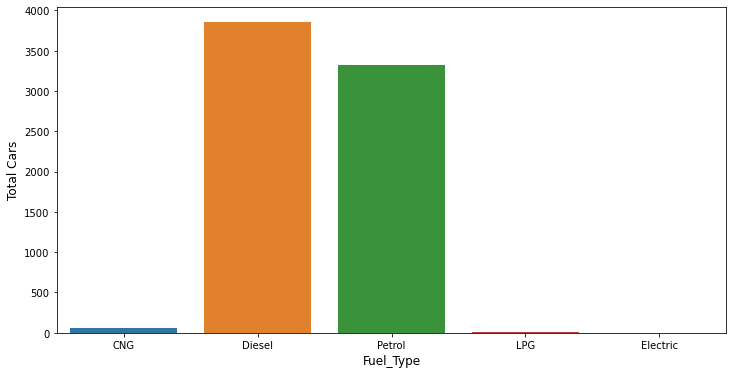

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x='Fuel_Type',data=used_car_copy)
plt.ylabel('Total Cars',fontsize=12)
plt.xlabel('Fuel_Type',fontsize=12)
plt.show()

In [81]:
(used_car_copy['Fuel_Type'].value_counts()/len(used_car_copy))*100

Diesel      53.109058
Petrol      45.843099
CNG          0.854819
LPG          0.165449
Electric     0.027575
Name: Fuel_Type, dtype: float64

**Insight:**<br>
1. **53%** of cars have fuel type as Diesel this shows diesel cars provide higher performance. <br>
2. **46%** of cars have fule type as petrol.

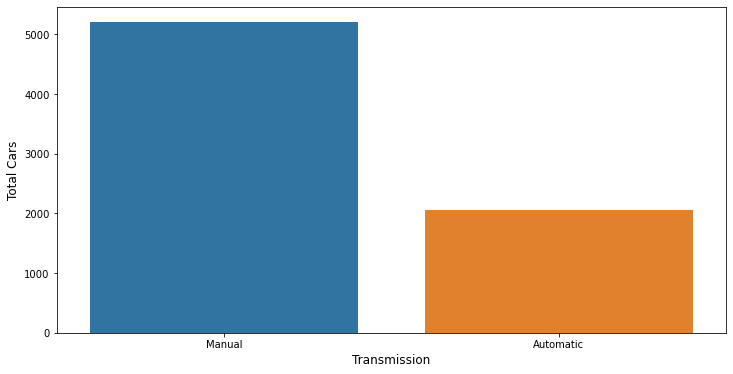

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x='Transmission',data=used_car_copy)
plt.ylabel('Total Cars',fontsize=12)
plt.xlabel('Transmission',fontsize=12)
plt.show()

In [83]:
(used_car_copy['Transmission'].value_counts()/len(used_car_copy))*100

Manual       71.749621
Automatic    28.250379
Name: Transmission, dtype: float64

**Insights:**<br>
1.**72%** of cars have Manual Transmission.<br>
2.**28%** of cars have Automatic Tranmission.

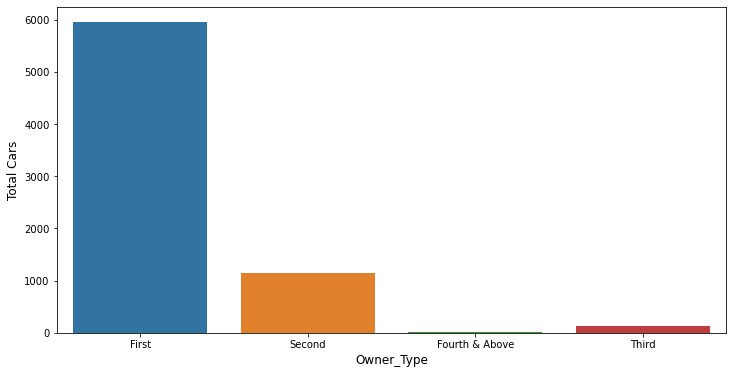

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x='Owner_Type',data=used_car_copy)
plt.ylabel('Total Cars',fontsize=12)
plt.xlabel('Owner_Type',fontsize=12)
plt.show()

In [85]:
(used_car_copy['Owner_Type'].value_counts()/len(used_car_copy))*100

First             82.062595
Second            15.883083
Third              1.888874
Fourth & Above     0.165449
Name: Owner_Type, dtype: float64

**Insights:**<br>
1. **82%** of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars

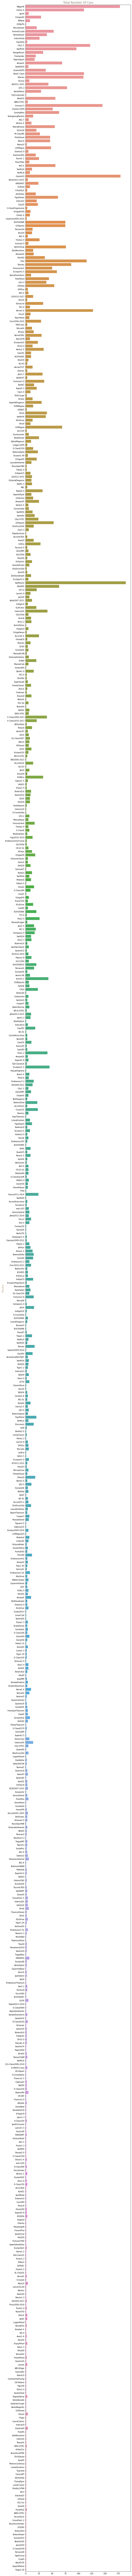

In [86]:
plt.figure(figsize=(10,250))
sns.countplot(y='Model',data=used_car_copy)
plt.title('Total Number Of Cars',fontsize=(15),color='#8B7D6B')
plt.ylabel('Model',fontsize=15,color='#CDB79E')
plt.xlabel(None)
plt.show()

In [90]:
## Top 10 Models

In [89]:
((used_car_copy['Model'].value_counts()/len(used_car_copy))*100).head(10)

SwiftDzire    2.605818
Grandi10      2.467944
WagonR        2.454157
Innova2.5     1.999173
Verna1.6      1.751000
City1.5       1.682063
Cityi         1.585551
Creta1.6      1.516614
NewC-Class    1.516614
3Series       1.502826
Name: Model, dtype: float64

**Insight:**:<br>
1. SwiftDzire ranks first among all models which are available for purchase. <br>
2. Top 5 highly acqiured cars by customers are SwiftDzire, Grandi10, WagonR, Innova2.5, Verna1.6

In [95]:
((used_car_copy['Seats'].value_counts()/len(used_car_copy))*100)

5.0     83.772232
7.0     11.002344
8.0      2.343858
4.0      1.640700
6.0      0.523921
2.0      0.248173
10.0     0.110299
9.0      0.041362
0.0      0.013787
Name: Seats, dtype: float64

**Insight:**: <br>
    1. **83%** Cars are 5 seaters.

In [91]:
## Relationship B/W The Feactures

In [92]:
used_car_copy.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age
Year,1.000000,-0.187859,0.295609,-0.053129,0.025056,0.010287,0.305327,-1.000000
Kilometers_Driven,-0.187859,1.000000,-0.069420,0.094587,0.028261,0.089906,-0.011493,0.187859
Mileage,0.295609,-0.069420,1.000000,-0.638117,-0.544585,-0.346008,-0.329980,-0.295609
Engine,-0.053129,0.094587,-0.638117,1.000000,0.859766,0.399142,0.658747,0.053129
Power,0.025056,0.028261,-0.544585,0.859766,1.000000,0.098158,0.773295,-0.025056
Seats,0.010287,0.089906,-0.346008,0.399142,0.098158,1.000000,0.052202,-0.010287
Price,0.305327,-0.011493,-0.329980,0.658747,0.773295,0.052202,1.000000,-0.305327
Car_Age,-1.000000,0.187859,-0.295609,0.053129,-0.025056,-0.010287,-0.305327,1.000000


**Insight:**<br> Price is highly correlated with **Power**,**Engine**,**Year**.

<br>
1. The variable Year has a positive correlation with price and mileage. <br>
2. A year has a Negative correlation with kilometers-Driven. <br>
3. Mileage is negatively correlated with Power. <br>
4. As power increases, mileage decreases. <br>
5. Car with recent make is higher at prices. As the age of the car increases price decreases. <br>
6. Engine and Power increase, and the price of the car increases. <br>
 

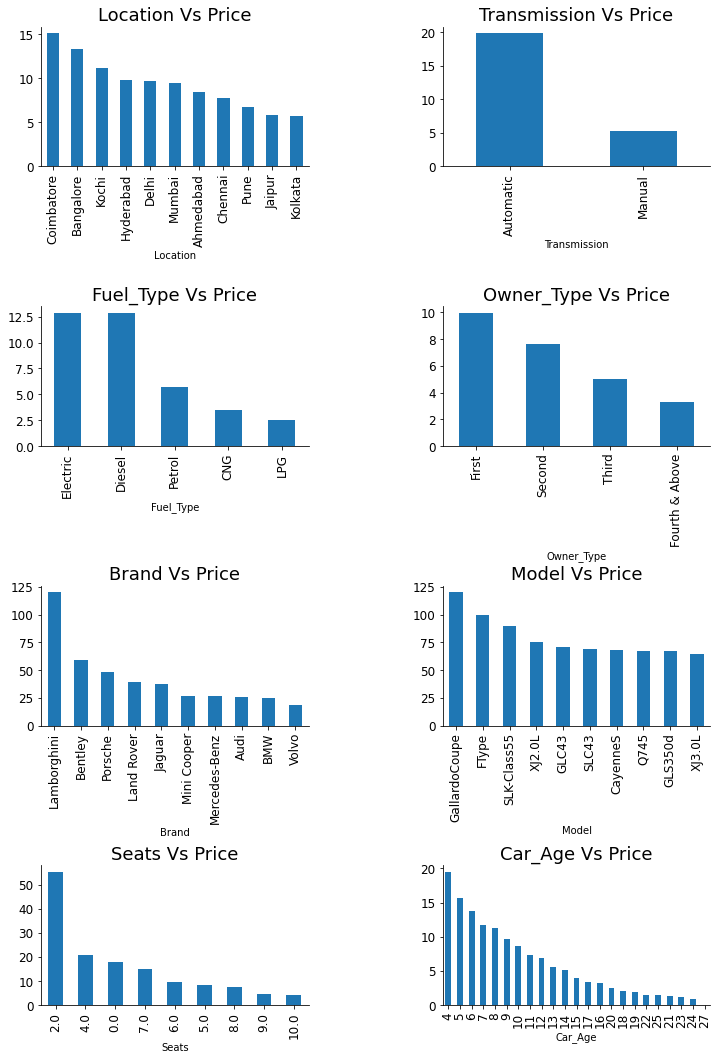

In [93]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

used_car_copy.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)

used_car_copy.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)

used_car_copy.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)

used_car_copy.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)

used_car_copy.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)

used_car_copy.groupby('Model')['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)

used_car_copy.groupby('Seats')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)

used_car_copy.groupby('Car_Age')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)

sns.despine()

**Observations**

1. The price of cars is high in Coimbatore and less price in Kolkata and Jaipur. <br>
2. Automatic cars have more price than manual cars.<br>
3. Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the          lowest price.<br>
4. First-owner cars are higher in price, followed by a second.<br>
5. The third owner’s price is lesser than the Fourth and above.<br>
6. Lamborghini brand is the highest in price.<br>
7. Gallardocoupe Model is the highest in price.<br>
8. 2 Seater has the highest price followed by 4 & 7 Seater.<br>
9. The latest model cars are high in price.<br>

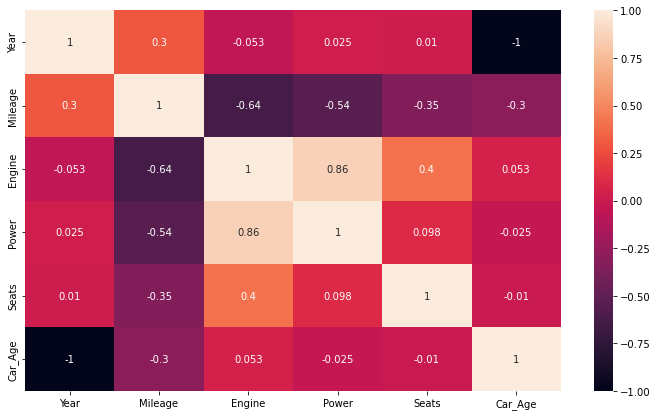

In [94]:
plt.figure(figsize=(12, 7))
sns.heatmap(used_car_copy.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

From the Heat map, we can infer the following:

1. The engine has a strong positive correlation to Power 0.86. <br>
2. Price has a positive correlation to Engine 0.69 as well Power 0.77. <br>
3. Mileage has correlated to Engine, Power, and Price negatively. <br>
4. Price is moderately positive in correlation to year. <br>
5. Kilometer driven has a negative correlation to year not much impact on the price. <br>
6. Car age has a negative correlation with Price. <br>
7. car Age is positively correlated to Kilometers-Driven as the Age of the car increases; 
   then the kilometer will also increase of car has a negative correlation with Mileage this makes sense <br>

**Insight:**<br>

1. Most of the customers prefer 2 Seat cars hence the price of the 2-seat cars is higher than other      cars.
2. The price of the car decreases as the Age of the car increases.
3. Customers prefer to purchase the First owner rather than the Second or Third.
4. Due to increased Fuel price, the customer prefers to purchase an Electric vehicle.
5. Automatic Transmission is easier than Manual.